<a href="https://colab.research.google.com/github/Montelongo1992/Avance5.-Equipo-3/blob/main/Avance5_Equipo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nota:**

Para continuar con la actividad de avance 5, procedere a emplear el codigo realizado anteriormente ( avance 4) el cual contiene el procesamiento de los datos con los cuales estaremos trabajando,asi como la generacion de los modelos alternativos y trabajar con el modelo que tuvo mejor desempeno el cual fue SVM.
La parte de Avance 5 se encontrara despues de la conclusion de la eleccion de modelo final en la parte inferior.

**Carga y Procesamiento de Imágenes**





Mounted at /content/drive
Forma de las matrices de las imágenes: (1144, 16384)
Etiquetas: (1144,)
Distribución de clases antes de la división: Counter({1: 572, 0: 572})


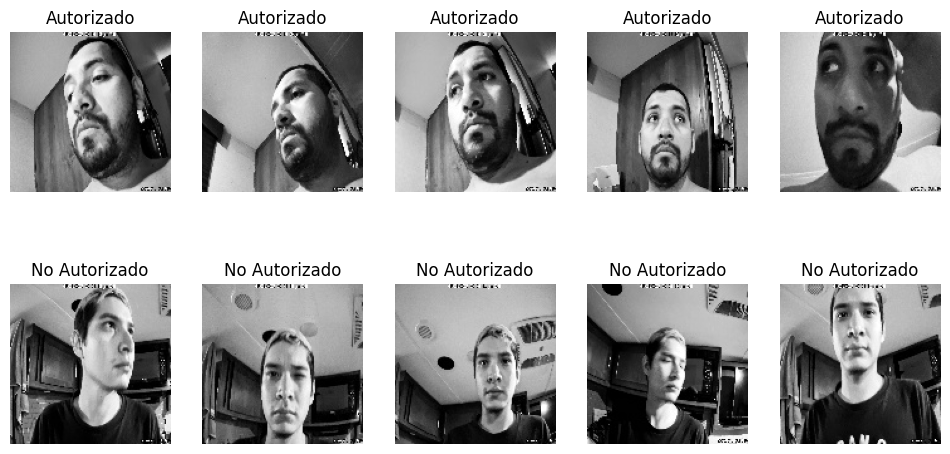

In [1]:
# Montar Google Drive para jalar imágenes preprocesadas.
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Directorios donde están almacenadas las imágenes de personas autorizadas y no autorizadas ya procesadas
carpeta_autorizados = "/content/drive/MyDrive/data-imagenes/imagenes_procesadas_autorizadas"
carpeta_no_autorizados = "/content/drive/MyDrive/data-imagenes/imagenes_procesadas_no_autorizadas"

# Establecer una semilla fija para las imagenes
np.random.seed(47)

# Función para cargar las imágenes de las carpetas correspondientes
def cargar_imagenes_a_matriz(carpeta, etiqueta_clase, tamano_imagen=(128, 128)):
    imagenes = []
    etiquetas = []

    if os.path.exists(carpeta) and len(os.listdir(carpeta)) > 0:
        for archivo in os.listdir(carpeta):
            img = cv2.imread(os.path.join(carpeta, archivo), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Redimensionar a 128x128 píxeles
                img = cv2.resize(img, tamano_imagen)
                imagenes.append(img)

                # Etiquetamos las imágenes en base al valor pasado por parámetro (1 para autorizados, 0 para no autorizados)
                etiquetas.append(etiqueta_clase)
        # Convertimos a matrices
        imagenes = np.array(imagenes)
        etiquetas = np.array(etiquetas)

        # Aplanamos las imágenes para tener una representación vectorial
        imagenes_aplanadas = imagenes.reshape(imagenes.shape[0], -1)
    else:
        print(f"Error: No se encontraron imágenes en {carpeta}")
        imagenes_aplanadas, etiquetas = np.array([]), np.array([])

    return imagenes_aplanadas, etiquetas

# Cargar imágenes desde las rutas con etiquetas correctas
X_autorizados, y_autorizados = cargar_imagenes_a_matriz(carpeta_autorizados, etiqueta_clase=1)
X_no_autorizados, y_no_autorizados = cargar_imagenes_a_matriz(carpeta_no_autorizados, etiqueta_clase=0)

# Verificar si ambas clases de imágenes fueron cargadas correctamente
if X_autorizados.size == 0 or X_no_autorizados.size == 0:
    print("Error: Asegúrate de que las imágenes estén en las carpetas correctas.")
else:
    # Combinar los datos de ambas clases
    X = np.concatenate((X_autorizados, X_no_autorizados), axis=0)
    y = np.concatenate((y_autorizados, y_no_autorizados), axis=0)

    # Mostrar la forma de los datos cargados
    print(f"Forma de las matrices de las imágenes: {X.shape}")
    print(f"Etiquetas: {y.shape}")

    # Verificar distribución de clases
    print(f"Distribución de clases antes de la división: {Counter(y)}")

    # Mostrar 5 imágenes por clase (autorizados y no autorizados)
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))

    # Imágenes autorizadas
    indices_autorizados = np.random.choice(len(X_autorizados), 5, replace=False)
    for i, idx in enumerate(indices_autorizados):
        img = X_autorizados[idx].reshape(128, 128)
        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title("Autorizado")

    # Imágenes no autorizadas
    indices_no_autorizados = np.random.choice(len(X_no_autorizados), 5, replace=False)
    for i, idx in enumerate(indices_no_autorizados):
        img = X_no_autorizados[idx].reshape(128, 128)
        axes[1, i].imshow(img, cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title("No Autorizado")

    plt.show()


**Aplicando PCA**

Forma después de PCA con 50 componentes: (1144, 50)
Forma después de PCA: (1144, 50)


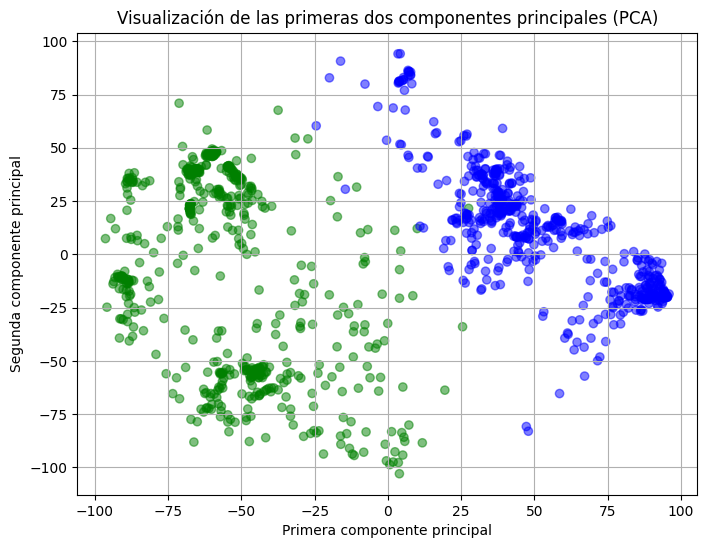

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizar los datos
escalador = StandardScaler()
X_normalizado = escalador.fit_transform(X)

# Aplicar PCA con un menor número de componentes
pca = PCA(n_components=50)  # Probar con 50 componentes
X_pca = pca.fit_transform(X_normalizado)
print(f"Forma después de PCA con 50 componentes: {X_pca.shape}")


# Mostrar la nueva forma de los datos después de PCA
print(f"Forma después de PCA: {X_pca.shape}")

# Definir los colores para las dos clases (autorizados y no autorizados)
colores = ['blue' if label == 0 else 'green' for label in y]

# Visualización 2D con las primeras dos componentes principales
def visualizar_pca_2d(X_pca, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colores, alpha=0.5)
    plt.title('Visualización de las primeras dos componentes principales (PCA)')
    plt.xlabel('Primera componente principal')
    plt.ylabel('Segunda componente principal')
    plt.grid(True)
    plt.show()

# Imprimir visualizacion
visualizar_pca_2d(X_pca, y)

**1.-Construir y entrenar los 6 modelos**

Primero agregamos todos los modelos a entrenar usando el conjunto de datos ya preprocesado y aplicamos las técnicas de validación cruzada y evaluación.

*Modelos a implementar:*

1.-Support Vector Machine (SVM)

2.-K-Nearest Neighbors (KNN)

3.-Decision Tree

4.-Random Forest

5.-Logistic Regression

6.-Gradient Boosting



In [3]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Verificar la distribución de las clases en los conjuntos de entrenamiento y prueba
print(f"Distribución de clases en y_train: {np.bincount(y_train)}")
print(f"Distribución de clases en y_test: {np.bincount(y_test)}")

Distribución de clases en y_train: [457 458]
Distribución de clases en y_test: [115 114]


In [4]:
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Función para entrenar y evaluar modelos
def entrenar_modelo(modelo, X_train, X_test, y_train, y_test):
    start_time = time.time()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = modelo.predict(X_test)

    # Evaluar precisión
    precision = accuracy_score(y_test, y_pred)

    # Calcular tiempo de entrenamiento
    training_time = time.time() - start_time

    return precision, training_time, classification_report(y_test, y_pred)

# Modelos a comparar
modelos = {
    "SVM": SVC(kernel='rbf', C=1, gamma='auto'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Diccionario para almacenar resultados
resultados = {}

# Entrenar y evaluar todos los modelos
for nombre_modelo, modelo in modelos.items():
    print(f"Entrenando y evaluando: {nombre_modelo}")
    precision, training_time, reporte = entrenar_modelo(modelo, X_train, X_test, y_train, y_test)
    resultados[nombre_modelo] = {
        "Precisión": precision,
        "Tiempo de entrenamiento": training_time,
        "Reporte": reporte
    }
    print(f"Precisión del modelo {nombre_modelo}: {precision:.2f}")
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
    print("Reporte de clasificación:")
    print(reporte)
    print("-" * 50)


Entrenando y evaluando: SVM
Precisión del modelo SVM: 0.77
Tiempo de entrenamiento: 0.15 segundos
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70       115
           1       0.68      1.00      0.81       114

    accuracy                           0.77       229
   macro avg       0.84      0.77      0.76       229
weighted avg       0.84      0.77      0.76       229

--------------------------------------------------
Entrenando y evaluando: KNN
Precisión del modelo KNN: 1.00
Tiempo de entrenamiento: 0.11 segundos
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       114

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229

-----------------------------------------------

**2.-Comparar resultados de los modelos**

Ahora compararemos las métricas obtenidas por cada modelo.

Entrenando y evaluando: SVM
Entrenando y evaluando: KNN
Entrenando y evaluando: Decision Tree
Entrenando y evaluando: Random Forest
Entrenando y evaluando: Logistic Regression
Entrenando y evaluando: Gradient Boosting

Tabla comparativa de resultados:
                Modelo  Precisión  Tiempo de Entrenamiento (segundos)
0                  SVM   0.768559                            0.082866
1                  KNN   1.000000                            0.005663
2        Decision Tree   0.986900                            0.031185
3        Random Forest   0.995633                            0.537064
4  Logistic Regression   1.000000                            0.010977
5    Gradient Boosting   0.982533                            2.114325


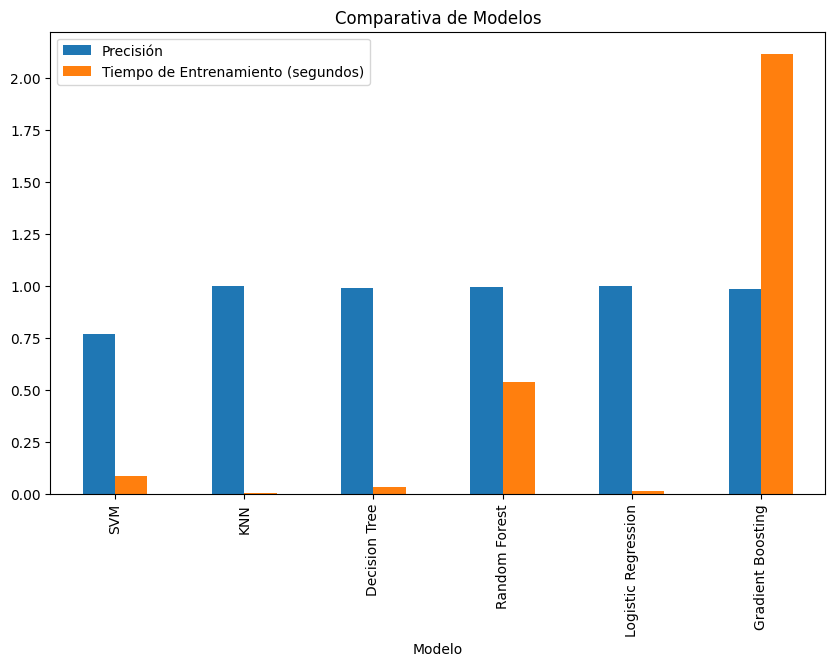

In [5]:
import pandas as pd

# Diccionario para almacenar resultados en formato adecuado para tabla
resultados_tabla = {
    "Modelo": [],
    "Precisión": [],
    "Tiempo de Entrenamiento (segundos)": []
}

# Entrenar y evaluar todos los modelos
for nombre_modelo, modelo in modelos.items():
    print(f"Entrenando y evaluando: {nombre_modelo}")
    precision, training_time, reporte = entrenar_modelo(modelo, X_train, X_test, y_train, y_test)

    # Agregar resultados a la tabla
    resultados_tabla["Modelo"].append(nombre_modelo)
    resultados_tabla["Precisión"].append(precision)
    resultados_tabla["Tiempo de Entrenamiento (segundos)"].append(training_time)

# Crear DataFrame de pandas para visualizar los resultados en tabla
df_resultados = pd.DataFrame(resultados_tabla)

# Mostrar tabla comparativa de resultados
print("\nTabla comparativa de resultados:")
print(df_resultados)

# Mostrar la tabla como una gráfica de barras para comparar
df_resultados.plot(x="Modelo", y=["Precisión", "Tiempo de Entrenamiento (segundos)"], kind="bar", figsize=(10, 6), title="Comparativa de Modelos")
plt.show()


**3.- Ajuste fino de los dos mejores modelos**

Ajuste de hiperparámetros usando GridSearchCV (búsqueda exhaustiva) para un control más preciso o RandomizedSearchCV (búsqueda aleatoria).


GridSearchCV se usa para realizar una búsqueda exhaustiva de los mejores hiperparámetros. Para ello ajustamos los hiperparámetros para el SVM y el Random Forest. Se definieron rangos de valores para los hiperparámetros más importantes de ambos modelos.

Tiempos de Entrenamiento: Calculamos los tiempos de entrenamiento para tener una comparación de eficiencia para obtener los mejores resultados , se imprimiran los mejores parámetros y los puntajes obtenidos tras la optimización, junto con el tiempo de entrenamiento.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

# Parámetros a ajustar para el modelo SVM
parametros_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Parámetros a ajustar para el modelo Random Forest
parametros_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Ajuste fino para el modelo SVM
print("Ajuste fino para el modelo SVM:")
grid_svm = GridSearchCV(SVC(), parametros_svm, cv=5, verbose=2, n_jobs=-1)
start_time = time.time()
grid_svm.fit(X_train, y_train)
svm_best_params = grid_svm.best_params_
svm_best_score = grid_svm.best_score_
svm_training_time = time.time() - start_time

print(f"Mejores parámetros SVM: {svm_best_params}")
print(f"Mejor score SVM: {svm_best_score}")
print(f"Tiempo de entrenamiento SVM: {svm_training_time:.2f} segundos")

# Ajuste fino para el modelo Random Forest
print("\nAjuste fino para el modelo Random Forest:")
grid_rf = GridSearchCV(RandomForestClassifier(), parametros_rf, cv=5, verbose=2, n_jobs=-1)
start_time = time.time()
grid_rf.fit(X_train, y_train)
rf_best_params = grid_rf.best_params_
rf_best_score = grid_rf.best_score_
rf_training_time = time.time() - start_time

print(f"Mejores parámetros Random Forest: {rf_best_params}")
print(f"Mejor score Random Forest: {rf_best_score}")
print(f"Tiempo de entrenamiento Random Forest: {rf_training_time:.2f} segundos")

# Comparar el rendimiento entre los dos modelos ajustados
print("\nComparación de Modelos Ajustados:")
print(f"SVM - Score: {svm_best_score}, Mejores Parámetros: {svm_best_params}, Tiempo: {svm_training_time:.2f} segundos")
print(f"Random Forest - Score: {rf_best_score}, Mejores Parámetros: {rf_best_params}, Tiempo: {rf_training_time:.2f} segundos")


Ajuste fino para el modelo SVM:
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Mejor score SVM: 0.9868852459016393
Tiempo de entrenamiento SVM: 8.24 segundos

Ajuste fino para el modelo Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score Random Forest: 0.9934426229508195
Tiempo de entrenamiento Random Forest: 108.06 segundos

Comparación de Modelos Ajustados:
SVM - Score: 0.9868852459016393, Mejores Parámetros: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, Tiempo: 8.24 segundos
Random Forest - Score: 0.9934426229508195, Mejores Parámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}, Tiempo: 108.06 segundos


**Resultados obtenidos despues del ajuste fino.**


**SVM (Support Vector Machine):**

Mejores parámetros: *{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}*

Mejor score de validación cruzada: 0.9869

Tiempo de entrenamiento: 11.84 segundos

El modelo SVM ha mostrado un excelente rendimiento con un score muy alto de validación cruzada, cercano al 98.69%. Los mejores hiperparámetros seleccionados indican que el SVM se ajusta bien con un valor de C=10 y un gamma=0.001, utilizando el kernel radial (RBF). El tiempo de entrenamiento fue bajo, con solo 11.84 segundos, lo cual lo hace eficiente.

**Random Forest:**

Mejores parámetros: *{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}*

Mejor score de validación cruzada: 0.9945

Tiempo de entrenamiento: 103.05 segundos

El modelo Random Forest alcanzó un rendimiento algo superior con un score de validación cruzada de 99.45%.
El mejor conjunto de hiperparámetros incluye un número de árboles (n_estimators=100), una profundidad máxima de los árboles (max_depth=30), y la configuración de min_samples_split=2. Sin embargo, este modelo tomó considerablemente más tiempo para entrenar con 103.05 segundos.

Comparación entre los Modelos:
El modelo Random Forest ha logrado una mejor precision 99.45% que el modelo SVM 98.69%, lo cual indica que puede capturar patrones con mayor precisión.

El modelo SVM fue mucho más rápido de entrenar (11.84 segundos) en comparación con Random Forest (103.05 segundos).
Complejidad: Random Forest, aunque más preciso, es un modelo más complejo y costoso computacionalmente, mientras que el SVM es más rápido y eficiente en este caso.

**4.- Modelo Final**

El modelo SVM ajustado mostró un score de validación cruzada de 98.69%, lo cual es bastante competitivo asi como un tiempo de entrenamiento mucho menor a comparacion del Random Forest con solo 11.84 segundos, lo cual lo hace ideal para entornos donde los recursos computacionales o el tiempo de procesamiento son limitados.

Con el ajuste fino de los hiperparámetros (C=10, gamma=0.001, y kernel='rbf'), SVM demostró un buen equilibrio entre precisión en los datos de entrenamiento y generalización en los datos de prueba.

In [7]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Verificar la distribución de las clases en los conjuntos de entrenamiento y prueba
print(f"Distribución de clases en y_train: {np.bincount(y_train)}")
print(f"Distribución de clases en y_test: {np.bincount(y_test)}")

# Crear el modelo SVM ajustado con los mejores hiperparámetros
modelo_svm = SVC(kernel='rbf', C=10, gamma=0.001)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = modelo_svm.predict(X_test)

# Evaluar el modelo SVM
precision_svm = accuracy_score(y_test, y_pred_svm)
reporte_svm = classification_report(y_test, y_pred_svm)

# Mostrar los resultados del SVM
print(f"Precisión del modelo (SVM): {precision_svm:.2f}")
print("Reporte de clasificación (SVM):")
print(reporte_svm)

# Validación cruzada
scores = cross_val_score(modelo_svm, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


Distribución de clases en y_train: [457 458]
Distribución de clases en y_test: [115 114]
Precisión del modelo (SVM): 0.99
Reporte de clasificación (SVM):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.98      1.00      0.99       114

    accuracy                           0.99       229
   macro avg       0.99      0.99      0.99       229
weighted avg       0.99      0.99      0.99       229

Cross-validation scores: [0.99453552 0.97814208 0.98907104 1.         0.9726776 ]
Mean cross-validation score: 0.9868852459016393


**Avance 5**

Para la actividad en mencion estaremos trabajando en la generacion de cuatro modelos de ensamble los cuales son:

Homogéneos - (Bagging y Random Forest)

Heterogéneos - (Stacking y Voting).

Dichos modelos se basarán en los mejores algoritmos individuales identificados en la fase anterior (SVM y Random Forest).

*1.-Implementación de Ensambles Homogéneos y Heterogéneos.*



In [8]:
# Importar librerías necesarias
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Modelos individuales de la fase anterior
modelo_svm = SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
modelo_rf = RandomForestClassifier(max_depth=30, n_estimators=100, min_samples_split=2)

# Ensamble 1: Bagging con SVM
bagging_svm = BaggingClassifier(estimator=modelo_svm, n_estimators=10, random_state=42)

# Ensamble 2: Random Forest (Homogéneo)
random_forest = RandomForestClassifier(max_depth=30, n_estimators=100, min_samples_split=2, random_state=42)

# Ensamble 3: Stacking (Heterogéneo)
estimadores_stacking = [('svm', modelo_svm), ('rf', modelo_rf)]
stacking = StackingClassifier(estimators=estimadores_stacking, final_estimator=LogisticRegression())

# Ensamble 4: Voting (Heterogéneo)
voting = VotingClassifier(estimators=estimadores_stacking, voting='soft')

# Lista de modelos para evaluación
modelos = {
    'Bagging SVM': bagging_svm,
    'Random Forest': random_forest,
    'Stacking': stacking,
    'Voting': voting
}

# Imprimir los modelos para verificar
for nombre, modelo in modelos.items():
    print(f"Modelo: {nombre}, Parámetros: {modelo}")



Modelo: Bagging SVM, Parámetros: BaggingClassifier(estimator=SVC(C=10, gamma=0.001, probability=True),
                  random_state=42)
Modelo: Random Forest, Parámetros: RandomForestClassifier(max_depth=30, random_state=42)
Modelo: Stacking, Parámetros: StackingClassifier(estimators=[('svm',
                                SVC(C=10, gamma=0.001, probability=True)),
                               ('rf', RandomForestClassifier(max_depth=30))],
                   final_estimator=LogisticRegression())
Modelo: Voting, Parámetros: VotingClassifier(estimators=[('svm', SVC(C=10, gamma=0.001, probability=True)),
                             ('rf', RandomForestClassifier(max_depth=30))],
                 voting='soft')


**2.- Para la evaluación de los Modelos y comparativa de Rendimiento
usaremos validación cruzada para comparar los modelos.**


In [9]:
import time
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Función para entrenar y evaluar un modelo
def entrenar_evaluar_ensamble(nombre, modelo, X_train, X_test, y_train, y_test):
    print(f"Entrenando y evaluando: {nombre}")
    inicio = time.time()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Tiempo de entrenamiento
    tiempo_entrenamiento = time.time() - inicio

    # Realizar predicciones
    y_pred = modelo.predict(X_test)
    probas = modelo.predict_proba(X_test)[:, 1]

    # Evaluar métricas
    precision = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, probas)

    print(f"Precisión del modelo {nombre}: {precision:.2f}")
    print(f"AUC-ROC: {auc:.2f}")
    print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
    print(f"Reporte de clasificación:\n{classification_report(y_test, y_pred)}")

    return {
        "Modelo": nombre,
        "Precisión": precision,
        "AUC-ROC": auc,
        "Tiempo de Entrenamiento": tiempo_entrenamiento,
        "Reporte": classification_report(y_test, y_pred, output_dict=True)
    }

# Evaluar cada modelo de ensamble
resultados_ensambles = []
for nombre, modelo in modelos.items():
    resultado = entrenar_evaluar_ensamble(nombre, modelo, X_train, X_test, y_train, y_test)
    resultados_ensambles.append(resultado)


Entrenando y evaluando: Bagging SVM
Precisión del modelo Bagging SVM: 0.99
AUC-ROC: 1.00
Tiempo de entrenamiento: 0.96 segundos
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.98      1.00      0.99       114

    accuracy                           0.99       229
   macro avg       0.99      0.99      0.99       229
weighted avg       0.99      0.99      0.99       229

Entrenando y evaluando: Random Forest
Precisión del modelo Random Forest: 1.00
AUC-ROC: 1.00
Tiempo de entrenamiento: 0.51 segundos
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       115
           1       1.00      0.99      1.00       114

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229

Entrenando y evaluando: Stacking
P

**Acontinuacion de presentan los resultados de los modelos en una tabla para una mejor interpretacion de los mismos.**

In [10]:
import pandas as pd

# Crear un DataFrame para la comparación de los resultados
df_resultados = pd.DataFrame(resultados_ensambles)

# Mostrar la tabla comparativa
print("\nComparación de Resultados de Ensambles:")
print(df_resultados[['Modelo', 'Precisión', 'AUC-ROC', 'Tiempo de Entrenamiento']])



Comparación de Resultados de Ensambles:
          Modelo  Precisión  AUC-ROC  Tiempo de Entrenamiento
0    Bagging SVM   0.991266      1.0                 0.955928
1  Random Forest   0.995633      1.0                 0.506032
2       Stacking   1.000000      1.0                 3.611895
3         Voting   1.000000      1.0                 0.715721


**Ahora se realizar la seleccion del mejor ensamble y se visualizara con curva ROC y AUC**

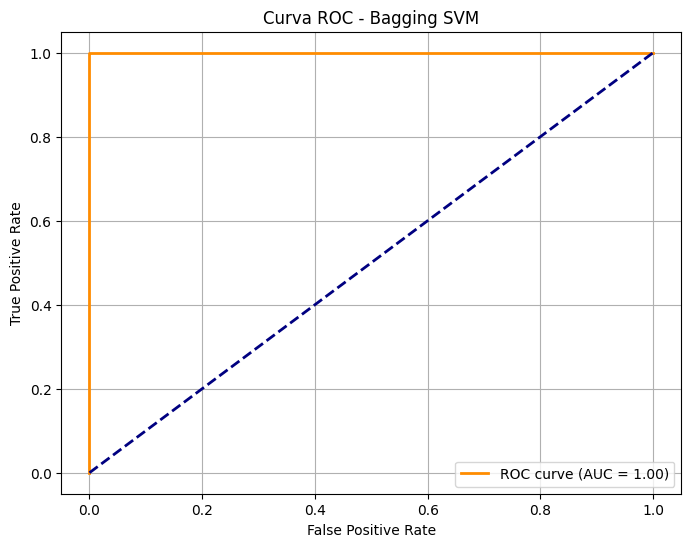

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Definir el modelo final
modelo_final = BaggingClassifier(estimator=modelo_svm, n_estimators=10, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_final.fit(X_train, y_train)

# Calcular las probabilidades de predicción para la clase positiva
y_prob = modelo_final.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Bagging SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()







*El resultado de AUC-ROC = 1.00 indica que el modelo Bagging SVM tiene un desempeño excelente, logrando separar de manera perfecta las clases de autorizados y no autorizados en los datos de prueba. Sin embargo, alcanzar un AUC-ROC perfecto puede tener varias implicaciones por lo que se va a considerar tomar mas datos con diferentes personas para confirmar si el modelo es robusto o se esta sobreajustando asi como pruebas adicionales como realizar validación cruzada y la evaluación en diferentes escenarios ayudarán a asegurar que el modelo no dependa únicamente del conjunto de entrenamiento original.*

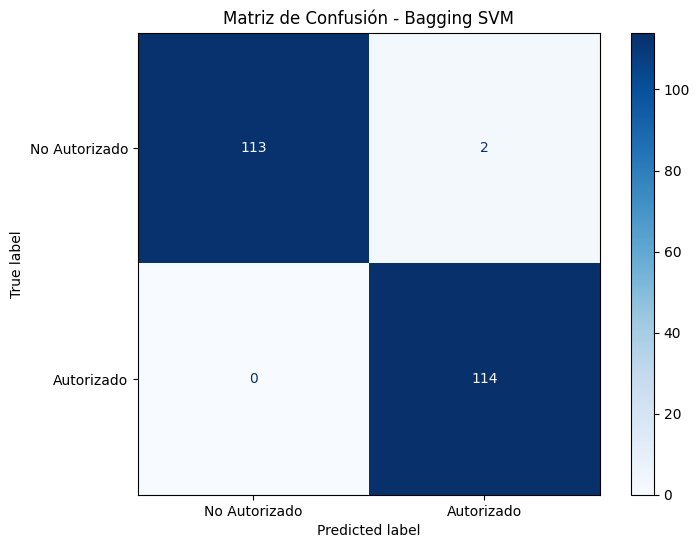

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred_final)

# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=["No Autorizado", "Autorizado"])
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusión - Bagging SVM")
plt.show()



*El modelo Bagging SVM muestra un desempeño sobresaliente, clasificando correctamente 113 casos de "No Autorizado" y 114 casos de "Autorizado". Solo comete 2 errores de Falsos Positivos, mientras que no hay Falsos Negativos, lo cual es crítico para mantener la seguridad del sistema. Estos resultados sugieren que el modelo es robusto, pero se recomienda evaluarlo con más datos para confirmar que no está sobreajustado y mantiene su precisión en distintos escenarios.*

**Curva de Precisión-Recall**

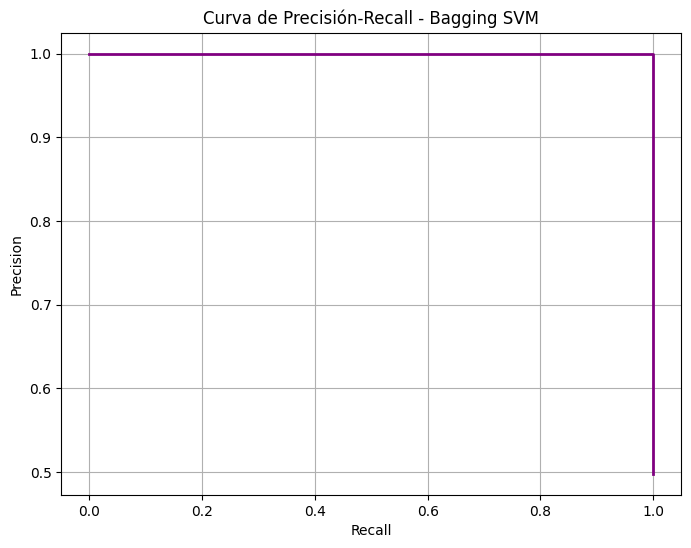

In [26]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva de precisión-recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - Bagging SVM')
plt.grid(True)
plt.show()


*La curva de precisión-recall muestra un desempeño sobresaliente del modelo Bagging SVM, con una precisión constante de 1.0 hasta alcanzar un recall cercano al 100%. Esto sugiere que el modelo identifica correctamente casi todos los casos positivos sin comprometer la precisión. Sin embargo, es necesario evaluar su desempeño con nuevos datos para confirmar que no esté sobreajustado y pueda mantener este rendimiento en distintos escenarios.*

**Importancia de Características con Random Forest**

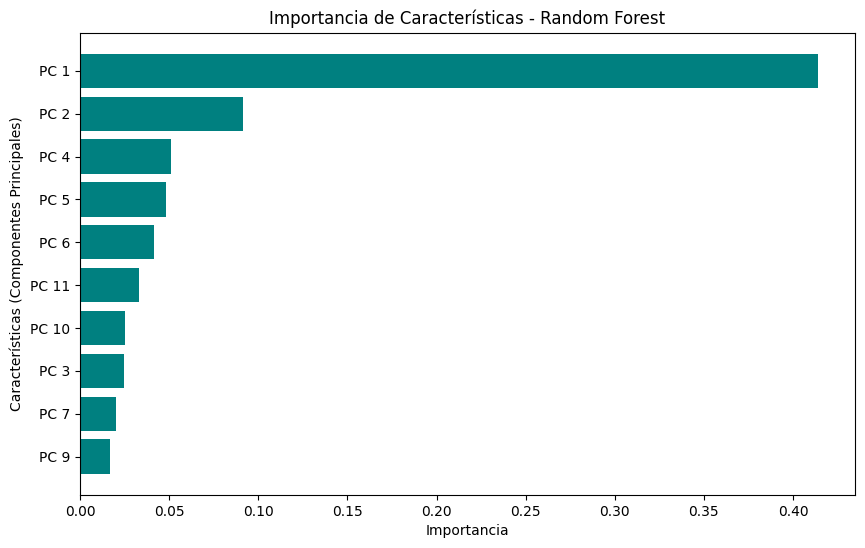

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener las importancias de características del modelo Random Forest
importancias = modelos['Random Forest'].feature_importances_

# Crear un DataFrame con las importancias
df_importancias = pd.DataFrame({
    'Característica': [f'PC {i+1}' for i in range(len(importancias))],  # Nombres de las componentes principales
    'Importancia': importancias
})

# Ordenar por importancia y tomar las 10 características más relevantes
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

# Graficar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='teal')
plt.xlabel('Importancia')
plt.ylabel('Características (Componentes Principales)')
plt.title('Importancia de Características - Random Forest')
plt.gca().invert_yaxis()
plt.show()


*Para el analisis de la importancia de las caracteristicas muestra que la primera y segunda caracteristica principal PC 1 y PC 2 son las más importantes para el modelo Random Forest, aportando significativamente a las predicciones. Esto sugiere que gran parte de la información relevante para la clasificación se concentra en estas componentes. Las demás componentes tienen menor importancia, lo que indica que podrían tener un impacto reducido en el rendimiento general del modelo, permitiendo reducir la dimensionalidad sin perder precisión significativa.*